In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = np.random.randn(5,5)
D = np.diag([5,4,3,2,1])
A = np.linalg.inv(S).dot(D).dot(S) 

In [3]:
A.shape

(5, 5)

In [4]:
# choose a vector
q = np.random.randn(5)
max_iter = 100
res =[]
for i in range(max_iter):
    q = A.dot(q)
    q = q/np.linalg.norm(q) # to avoid overflow
    lam = q.T.dot(A).dot(q)
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

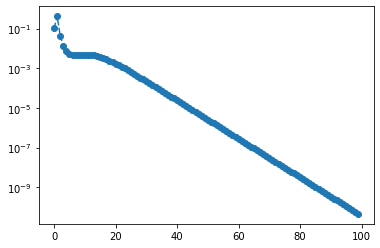

In [5]:
plt.semilogy(res,'o--')

In [6]:
lam

4.999999997798277

In [7]:
q

array([-0.16440834,  0.77436694,  0.02110076,  0.2605692 , -0.55225374])

In [8]:
# residual
np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A)

4.660646303633308e-11

In [9]:
## Rounding errors can be beneficial
A = np.array([[0.4,-0.6,0.2],[-0.3,0.7,-0.4],[-0.1,-0.4,0.5]])
q = np.array([1,1,1])
# power method
max_iter = 100
res =[]
for i in range(max_iter):
    q = A.dot(q)
    q = q/np.linalg.norm(q) # to avoid overflow
    lam = q.T.dot(A).dot(q)
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

In [10]:
lam

1.1605551275463986

In [11]:
q 

array([ 0.63685249, -0.69842825,  0.32652241])

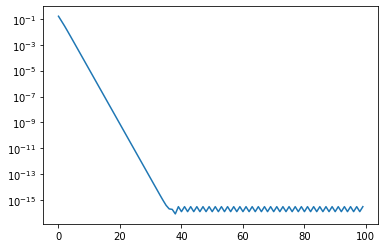

In [12]:
plt.semilogy(res)

## Inverse iteration

In [13]:
# random matrix with eigenvalues 1,2,3,4,5
S = np.random.randn(5,5)
D = np.diag([5,4,3,2,1])
A = np.linalg.inv(S).dot(D).dot(S) 

In [14]:
from scipy.linalg import lu_factor
from scipy.linalg import lu_solve

In [15]:
q = np.random.randn(5)
max_iter = 100
res = []
# LU factorization of A
lu, p = lu_factor(A)
# inverse iteration
for k in range(max_iter):
    q = lu_solve((lu,p),q) # approximate eigenvector
    q = q/np.linalg.norm(q) 
    lam = q.T.dot(A).dot(q) # approximate eigenvalue
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

In [16]:
lam

0.9999999999999999

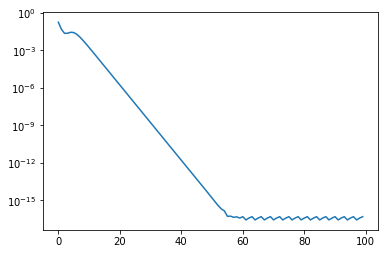

In [17]:
plt.semilogy(res)

## shift-and-invert iteration

In [18]:
shift = 2
max_iter = 100
res = []
lu,p = lu_factor(A-shift*np.eye(5))
q = np.random.randn(5)
for k in range(max_iter):
    q = lu_solve((lu,p),q)
    q = q/np.linalg.norm(q)
    lam = q.T.dot(A).dot(q)
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

In [19]:
lam

2.0000000000000004

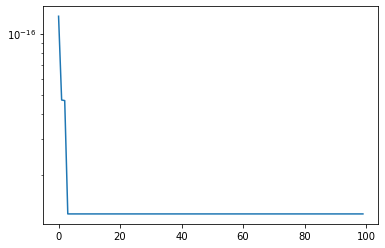

In [20]:
plt.semilogy(res)

## The west0479 matrix

In [21]:
from scipy.io import mmread # to load matrices from the matrix market
A = mmread('west0479.mtx.gz')

In [22]:
# A is sparse; numpy stores only the nonzero entries
A

<479x479 sparse matrix of type '<class 'numpy.float64'>'
	with 1910 stored elements in COOrdinate format>

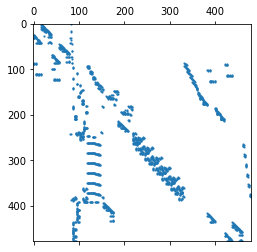

In [23]:
# display the nonzero entries of A
plt.spy(A,markersize=1)

In [24]:
# A as a dense matrix
A = A.toarray() 

In [25]:
# NumPy uses j as the imaginary unit sqrt(-1)
eigvalues, eigvectors = np.linalg.eig(A)
eigvalues

array([ 9.21360904e-03+1.70066232e+03j,  9.21360904e-03-1.70066232e+03j,
        1.08125256e+02+5.40659386e+01j,  1.08125256e+02-5.40659386e+01j,
       -7.24015165e+00+1.20672188e+02j, -7.24015165e+00-1.20672188e+02j,
       -1.00885104e+02+6.66062491e+01j, -1.00885104e+02-6.66062491e+01j,
       -7.46535209e+01+0.00000000e+00j, -2.33008454e+01+7.06894790e+01j,
       -2.33008454e+01-7.06894790e+01j,  5.97889701e+01+4.36888114e+01j,
        5.97889701e+01-4.36888114e+01j,  7.46354391e+01+0.00000000e+00j,
        4.30619433e+01+3.91642807e+01j,  4.30619433e+01-3.91642807e+01j,
       -3.51604828e+01+3.93977635e+01j, -3.51604828e+01-3.93977635e+01j,
        1.75485461e+01+3.42378225e+01j,  1.75485461e+01-3.42378225e+01j,
        3.37069530e+01+1.75567223e+01j,  3.37069530e+01-1.75567223e+01j,
        2.52160374e+01+2.52168500e+01j,  2.52160374e+01-2.52168500e+01j,
       -2.52159383e+01+2.52167700e+01j, -2.52159383e+01-2.52167700e+01j,
       -3.16797902e+01+1.71254837e+01j, -3.16797902

In [26]:
# sort eigenvalues by absolute value
sorted_eigvalues = eigvalues[np.argsort(np.abs(eigvalues))][::-1]
sorted_eigvalues

array([ 9.21360904e-03+1.70066232e+03j,  9.21360904e-03-1.70066232e+03j,
       -1.00885104e+02+6.66062491e+01j, -1.00885104e+02-6.66062491e+01j,
        1.08125256e+02+5.40659386e+01j,  1.08125256e+02-5.40659386e+01j,
       -7.24015165e+00+1.20672188e+02j, -7.24015165e+00-1.20672188e+02j,
       -7.46535209e+01+0.00000000e+00j,  7.46354391e+01+0.00000000e+00j,
       -2.33008454e+01+7.06894790e+01j, -2.33008454e+01-7.06894790e+01j,
        5.97889701e+01+4.36888114e+01j,  5.97889701e+01-4.36888114e+01j,
        4.30619433e+01-3.91642807e+01j,  4.30619433e+01+3.91642807e+01j,
       -3.51604828e+01+3.93977635e+01j, -3.51604828e+01-3.93977635e+01j,
        1.75485461e+01+3.42378225e+01j,  1.75485461e+01-3.42378225e+01j,
        3.37069530e+01+1.75567223e+01j,  3.37069530e+01-1.75567223e+01j,
       -3.16797902e+01+1.71254837e+01j, -3.16797902e+01-1.71254837e+01j,
       -3.56621044e+01+0.00000000e+00j,  3.56618691e+01+0.00000000e+00j,
        2.52160374e+01+2.52168500e+01j,  2.52160374

In [27]:
# no gap between largest and second largest eigenvalue 
np.abs(sorted_eigvalues)

array([1.70066232e+03, 1.70066232e+03, 1.20889192e+02, 1.20889192e+02,
       1.20889192e+02, 1.20889192e+02, 1.20889192e+02, 1.20889192e+02,
       7.46535209e+01, 7.46354391e+01, 7.44307183e+01, 7.44307183e+01,
       7.40502072e+01, 7.40502072e+01, 5.82080049e+01, 5.82080049e+01,
       5.28057130e+01, 5.28057130e+01, 3.84731070e+01, 3.84731070e+01,
       3.80052257e+01, 3.80052257e+01, 3.60123770e+01, 3.60123770e+01,
       3.56621044e+01, 3.56618691e+01, 3.56614367e+01, 3.56614367e+01,
       3.56613100e+01, 3.56613100e+01, 3.56608352e+01, 3.56608352e+01,
       3.49480351e+01, 3.49480351e+01, 3.48282376e+01, 3.48282376e+01,
       3.38714815e+01, 3.37389146e+01, 2.67568685e+01, 2.67568685e+01,
       1.93358785e+01, 1.93358785e+01, 1.88853827e+01, 1.88853827e+01,
       1.87003936e+01, 1.87003936e+01, 1.84185268e+01, 1.84185268e+01,
       1.83173600e+01, 1.83173600e+01, 1.81334485e+01, 1.81334485e+01,
       1.74207490e+01, 1.74207490e+01, 1.69324902e+01, 1.66634205e+01,
      

In [28]:
# power method
n = A.shape[0]
q = np.random.randn(n)+np.random.randn(n)*1j
max_iter = 100
res =[]
for i in range(max_iter):
    q = A.dot(q)
    q = q/np.linalg.norm(q) # to avoid overflow
    lam = q.dot((A).dot(q))
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A,ord=1))

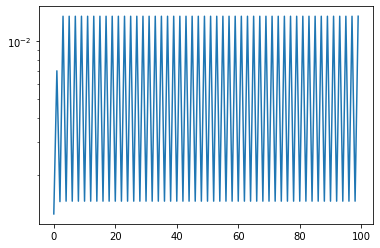

In [29]:
# power method does not converge
plt.semilogy(res)

In [30]:
# inverse iteration
q = np.random.randn(n)
max_iter = 100
res = []
# LU factorization of A
lu, p = lu_factor(A)
# inverse iteration
for k in range(max_iter):
    q = lu_solve((lu,p),q) # approximate eigenvector
    q = q/np.linalg.norm(q) 
    lam = q.dot(A.dot(q)) # approximate eigenvalue
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

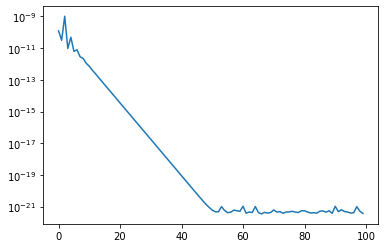

In [31]:
plt.semilogy(res)

In [32]:
lam

0.00017125181545814516

In [33]:
# find the e'value near 15+i35
shift = 15+35j
max_iter = 30
res = []
lu,p = lu_factor(A-shift*np.eye(n))
q = np.random.randn(n)
for k in range(max_iter):
    q = lu_solve((lu,p),q)
    q = q/np.linalg.norm(q)
    lam = np.vdot(q,(A.dot(q)))
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

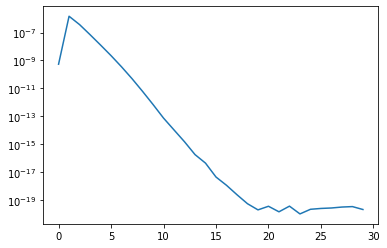

In [34]:
plt.semilogy(res)

## The Rayleigh iteration

In [35]:
# find the e'value near 10+i35
shift = 15+35j
max_iter = 5
res = []
q = np.random.randn(n)
for k in range(max_iter):
    q = np.linalg.solve(A-shift*np.eye(n),q)
    q = q/np.linalg.norm(q)
    lam = np.vdot(q,(A.dot(q)))
    shift = lam
    res.append(np.linalg.norm(A.dot(q)-lam*q)/np.linalg.norm(A))

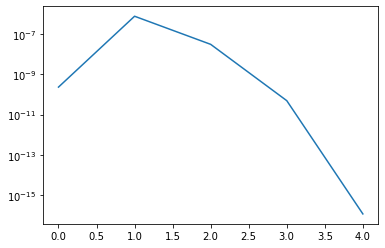

In [36]:
plt.semilogy(res)

## The QR method

In [37]:
# nxn complex matrix
n = 5
A = np.random.randn(n,n)+1j*np.random.randn(n,n)

In [38]:
evalues, evectors = np.linalg.eig(A)
evalues

array([ 1.93852081+1.97283443j,  0.54393342-1.073845j  ,
       -1.37922646-1.44395551j, -2.29780515+0.12931421j,
       -1.62072441+1.74394592j])

In [39]:
np.abs(evalues)

array([2.76585224, 1.20374692, 1.99681575, 2.301441  , 2.38077613])

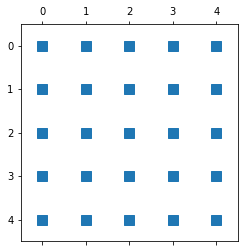

In [40]:
plt.spy(A,markersize=10,precision=1e-4)

In [49]:
# QR steps
for i in range(100):
    Q,R = np.linalg.qr(A)
    A = R.dot(Q)

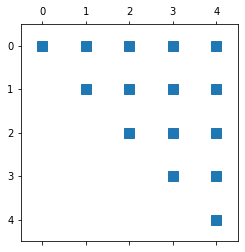

In [50]:
plt.spy(A,markersize=10,precision=1e-4)

In [51]:
np.diag(A)

array([ 1.93852081+1.97283443j, -1.62072445+1.7439424j ,
       -2.29780511+0.12931773j, -1.37922646-1.44395551j,
        0.54393342-1.073845j  ])

In [52]:
evalues

array([ 1.93852081+1.97283443j,  0.54393342-1.073845j  ,
       -1.37922646-1.44395551j, -2.29780515+0.12931421j,
       -1.62072441+1.74394592j])